### Assignment 3
#### Name: Serena Yang

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### 1. [40 pts] Query Expansion and Relevance Feedback

#### a. 

In [2]:
#take a set of documents as input
with open('/Users/serenayang/Desktop/csc575/Assignment 3/hw3-test-docs.txt') as file:
    lines = file.readlines()

wordset = []
txt = []
for line in lines:
    temp = {}
    for word in line.split():
        if word in temp:
            temp[word] += 1
        else:
            temp[word] = 1

        if word not in wordset:
            wordset.append(word)
    txt.append(temp)


wordset = sorted(wordset)
word_matrix = []
word_dic = {}
count = []

for query in txt:
    for word in wordset:
        if word in query:
            count.append(query[word])
        else:
            count.append(0)
    word_matrix.append(count)
    count = []

matrix = pd.DataFrame(word_matrix)
matrix.columns = wordset

display(matrix)

,cluster,collect,document,engin,eval,feedback,file,index,inform,process,queri,relev,retriev,search,system,web
0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1,0,1,2,0,0,0,1,2,0,0,0,0,0,1,1,0
2,0,1,1,0,0,0,0,1,0,0,3,0,0,2,0,0
3,0,0,0,0,0,0,0,1,2,0,0,0,2,2,1,0
4,0,0,0,2,0,0,0,2,0,0,1,0,0,2,0,3
5,0,1,1,0,0,0,0,1,0,2,1,0,1,0,1,0
6,0,0,0,0,0,1,0,0,2,1,1,2,1,0,0,0
7,0,0,1,0,0,1,0,0,0,0,1,2,0,1,0,0
8,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,1
9,0,0,0,0,1,1,0,0,0,0,2,2,0,0,0,0


#### b.

In [3]:
def modify_query(Q, R, NR, alpha, beta):
    result = []
    result.append(Q)

    re = [0] * len(wordset)
    for i in R:
        for j in range(len(word_matrix[i])):
            re[j] += word_matrix[i][j]

    positive = [0] * len(wordset)
    for r in range(len(re)):
        positive[r] = alpha * re[r] / len(R)
    
    nre = [0] * len(wordset)
    for m in NR:
        for n in range(len(word_matrix[m])):
            nre[n] += word_matrix[m][n]
    
    negative = [0] * len(wordset)
    for r in range(len(nre)):
        negative[r] = beta * nre[r] / len(NR)


    Q1 = [0] * len(wordset)
    for i in range(len(positive)):
        Q1[i] = round(Q[i] + positive[i] - negative[i], 3)
        for j in range(len(negative)):
            if Q1[j] < 0:
                Q1[j] = 0
                
    result.append(Q1)
    resulttable = pd.DataFrame(result)
    resulttable.columns = wordset
    return resulttable

In [4]:
Q = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0]
R = [0, 2, 8, 13]
NR = [6, 7, 14]
alpha = 0.5
beta = 0.25

modify_query(Q, R, NR, alpha, beta)

,cluster,collect,document,engin,eval,feedback,file,index,inform,process,queri,relev,retriev,search,system,web
0,0.0,0.000,0.000,0.000,0,1.000,0.0,0.00,0,0.000,1.000,2.000,0.0,0.000,0.000,0.000
1,0.0,0.125,0.167,0.125,0,0.708,0.0,0.25,0,0.167,1.583,1.625,0.0,0.417,0.125,0.125


#### C.

In [5]:
import math
def CosineSimilarity(word_matrix, Q):
    resultlist = []

    for i in range(len(word_matrix)):
        x, y, xy = 0, 0, 0
        for j in range(len(word_matrix[i])):
            x += Q[j] ** 2
            xy += word_matrix[i][j] * Q[j]
            y += word_matrix[i][j] ** 2
        temp = xy/(math.sqrt(x) * math.sqrt(y))
        resultlist.append(round(temp,3))
        

    result = pd.DataFrame(resultlist, columns = ['cosine'])
    resulttable = result.sort_values(by=['cosine'], ascending=False)
    return resulttable
    

In [6]:
CosineSimilarity(word_matrix, Q)

,cosine
9,0.904
7,0.866
13,0.730
6,0.707
14,0.656
2,0.306
0,0.183
8,0.154
5,0.129
4,0.087


In [7]:
Q1 = [0.0, 0.125, 0.167, 0.125, 0, 0.708, 0.0, 0.25, 0, 0.167, 1.583, 1.625, 0.0, 0.417, 0.125, 0.125]
CosineSimilarity(word_matrix, Q1)

,cosine
9,0.920
7,0.884
13,0.821
6,0.673
2,0.625
14,0.503
8,0.399
0,0.357
5,0.334
4,0.308


#### d.

In [8]:
def Jaccard(matrix):
    dotM = np.dot(matrix.T, matrix)
    dotM = pd.DataFrame(dotM)
    
    S = pd.DataFrame(dotM, index = matrix.columns, columns = matrix.columns)
    for i in dotM.index:
        for j in dotM.columns:
            cij = dotM.iloc[i,j]
            cii = dotM.iloc[i,i]
            cjj = dotM.iloc[j,j]
            S.iloc[i,j] = round(cij/(cii+cjj-cij),3)

    return S

In [9]:
Jaccard(matrix)

,cluster,collect,document,engin,eval,feedback,file,index,inform,process,queri,relev,retriev,search,system,web
cluster,1.000,0.000,0.231,0.200,0.000,0.000,0.000,0.000,0.067,0.000,0.000,0.000,0.278,0.095,0.000,0.143
collect,0.000,1.000,0.400,0.000,0.000,0.000,0.333,0.333,0.000,0.250,0.211,0.000,0.050,0.167,0.400,0.000
document,0.231,0.400,1.000,0.200,0.000,0.043,0.200,0.412,0.048,0.200,0.240,0.077,0.261,0.381,0.250,0.100
engin,0.200,0.000,0.200,1.000,0.000,0.000,0.000,0.333,0.000,0.077,0.125,0.000,0.190,0.389,0.000,0.800
eval,0.000,0.000,0.000,0.000,1.000,0.364,0.000,0.000,0.083,0.000,0.100,0.267,0.111,0.000,0.000,0.000
feedback,0.000,0.000,0.043,0.000,0.364,1.000,0.000,0.000,0.263,0.111,0.179,0.765,0.292,0.069,0.000,0.000
file,0.000,0.333,0.200,0.000,0.000,0.000,1.000,0.167,0.000,0.000,0.000,0.000,0.000,0.056,0.250,0.000
index,0.000,0.333,0.412,0.333,0.000,0.000,0.167,1.000,0.143,0.111,0.269,0.000,0.192,0.550,0.417,0.333
inform,0.067,0.000,0.048,0.000,0.083,0.263,0.000,0.143,1.000,0.125,0.107,0.273,0.526,0.160,0.250,0.000
process,0.000,0.250,0.200,0.077,0.000,0.111,0.000,0.111,0.125,1.000,0.227,0.143,0.190,0.087,0.222,0.059


#### e.

In [10]:
def expand_query(Q0, S, n):
    print('Initial Query:', Q0)
    finallist = []
    for j in Q0:  
        finallist.append(j)
    for Q in Q0:
        sublist = []
        print('Query Term:', Q)
        temp = S.sort_values(by=Q, ascending = False)
        for i in range(n):
            get = temp.index[i+1]
            sublist.append(get)
            if get not in finallist:
                finallist.append(get)
        print('Similar Terms:', sublist)
    print('Expanded Query:', finallist)  

In [11]:
Q0 = ['relev', 'retriev']
n = 1
S = Jaccard(matrix)
expand_query(Q0, S, n)

Initial Query: ['relev', 'retriev']
Query Term: relev
Similar Terms: ['feedback']
Query Term: retriev
Similar Terms: ['inform']
Expanded Query: ['relev', 'retriev', 'feedback', 'inform']


In [12]:
Q0 = ['relev', 'retriev']
n = 2
expand_query(Q0, S, n)

Initial Query: ['relev', 'retriev']
Query Term: relev
Similar Terms: ['feedback', 'queri']
Query Term: retriev
Similar Terms: ['inform', 'feedback']
Expanded Query: ['relev', 'retriev', 'feedback', 'queri', 'inform']


### 2. [60 pts] Collaborative Filtering for Recommendation

In [2]:
def convertmatrix(file):
    user_id = []
    book_id = []
    for line in file[1:]:
        temp = line.split(',')
        if temp[0] not in user_id:
            user_id.append(temp[0])
        if temp[1] not in book_id:
            book_id.append(temp[1])

    data = []
    userlist = {}
    for user in range(len(user_id)):
        tempuser = [0]*(len(book_id))
        for line in file[1:]:
            temp = line.split(',')
            if int(temp[0]) == user:
                #print(temp)
                tempuser[int(temp[1])] = int(temp[2].strip('\n'))
            else:
                #print(tempuser)
                #print("check")
                userlist[user] = tempuser
                pass
    
    matrixdata = []
    for i in userlist:
        matrixdata.append(userlist[i])
        
    dataset = pd.DataFrame(matrixdata, dtype=int)

    return dataset

In [3]:
with open('/Users/serenayang/Desktop/csc575/Assignment 3/hw3-book-ratings-40.csv')as file:
    file = file.readlines()

ratings = convertmatrix(file)
ratings.head()

,0,1,2,3,4,5,6,7
0,2,4,0,3,0,0,1,1
1,0,5,0,0,3,2,1,0
2,3,0,1,2,2,0,0,5
3,0,3,0,0,4,1,0,3
4,2,4,3,0,0,2,1,0


a. 

i. 

In [15]:
import math
def PearsonCor(X,Y):
    sum_X = 0
    sum_Y = 0
    sum_XY = 0
    squareSum_X = 0
    squareSum_Y = 0
    n = len(X)
    
    i = 0
    while i < n :
        # sum of elements of array X.
        sum_X = sum_X + X[i]
          
        # sum of elements of array Y.
        sum_Y = sum_Y + Y[i]
          
        # sum of X[i] * Y[i].
        sum_XY = sum_XY + X[i] * Y[i]
          
        # sum of square of array elements.
        squareSum_X += X[i] * X[i]
        squareSum_Y = squareSum_Y + Y[i] * Y[i]
          
        i = i + 1
       
    # use formula for calculating correlation 
    # coefficient.
    
    corr = (n * sum_XY - sum_X * sum_Y)/(math.sqrt((n * squareSum_X - (sum_X **2))* (n * squareSum_Y - sum_Y * sum_Y)))
        
    return round(corr,3)
    

In [16]:
def findKNN(ratings, K, user):
    #get MeanRating
    MeanRating = []
    for i in ratings.index:
        count, total = 0, 0
        for j in ratings.loc[i,:]:
            if j != 0:
                total += j
                count += 1
        temp = total/count
        MeanRating.append(round(temp,3))
    
    newtable = ratings.copy()
    newtable['MeanRating'] = MeanRating
    
    #split dataset into test and train
    train = newtable.loc[0:29,:]
    test = newtable.loc[30:39,:]
    
    #get Correlation with User
    Correlation = []
    X, Y = [],[]
    print(test)
    tempX = test.loc[user,:]
    for i in train.index:
        tempY = train.loc[i,:]
        for j in range(8):
            if (tempX[j] != 0) and (tempY[j]!= 0):
                X.append(tempX[j])
                Y.append(tempY[j])
        Correlation.append(PearsonCor(X,Y))
        X, Y = [],[]
    
    
    train['Correlation'] = Correlation
    train = train.sort_values(by = 'Correlation', ascending=False)
    cols = ['MeanRating', 'Correlation']
    result = train.loc[:,cols]
    return result

In [17]:
findKNN(ratings, 10, 35).head(10)

,MeanRating,Correlation
15,2.200,1.000
28,2.750,0.996
22,2.167,0.939
24,2.200,0.866
5,2.833,0.577
13,3.333,0.522
16,2.833,0.500
19,3.143,0.192
26,2.750,0.000
20,3.500,0.000


In [18]:
findKNN(ratings, 10, 39).head(10)

,MeanRating,Correlation
8,3.000,1.000
28,2.750,1.000
16,2.833,0.980
19,3.143,0.949
12,3.750,0.945
29,2.000,0.945
15,2.200,0.866
2,2.600,0.866
9,3.400,0.843
23,2.333,0.707


ii. 

In [5]:
import math
def PearsonCor(X,Y):
    sum_X = 0
    sum_Y = 0
    sum_XY = 0
    squareSum_X = 0
    squareSum_Y = 0
    n = len(X)
    
    i = 0
    while i < n :
        # sum of elements of array X.
        sum_X = sum_X + X[i]
          
        # sum of elements of array Y.
        sum_Y = sum_Y + Y[i]
          
        # sum of X[i] * Y[i].
        sum_XY = sum_XY + X[i] * Y[i]
          
        # sum of square of array elements.
        squareSum_X += X[i] * X[i]
        squareSum_Y = squareSum_Y + Y[i] * Y[i]
          
        i = i + 1
       
    # use formula for calculating correlation 
    # coefficient.
    denomiter = math.sqrt((n * squareSum_X - (sum_X **2))* (n * squareSum_Y - sum_Y * sum_Y))
    if denomiter == 0:
        corr = 0
    else:
        corr = (n * sum_XY - sum_X * sum_Y)/denomiter
    
    return round(corr,3)

In [11]:
def findKNN(train, test, K, user):
    
    #get Correlation with User
    Correlation = []
    X, Y = [],[]
    #print(test)
    tempX = test.loc[user,:]
    for i in train.index:
        tempY = train.loc[i,:]
        for j in range(8):
            if (tempX[j] != 0) and (tempY[j]!= 0):
                X.append(tempX[j])
                Y.append(tempY[j])
    
        Correlation.append(PearsonCor(X,Y))
        X, Y = [],[]
    
    train_cor = train.copy()
    train_cor['Correlation'] = Correlation
    train_cor = train_cor.sort_values(by = 'Correlation', ascending=False)
    
    return train_cor

In [7]:
def predict(ratings, K, user, item):
    #read in book name
    bookname = pd.read_csv('/Users/serenayang/Desktop/csc575/Assignment 3/hw3-book-names.csv')

    #get MeanRating
    MeanRating = []
    for i in ratings.index:
        count, total = 0, 0
        for j in ratings.loc[i,:]:
            if j != 0:
                total += j
                count += 1
        temp = total/count
        MeanRating.append(round(temp,3))
    
    newtable = ratings.copy()
    newtable['MeanRating'] = MeanRating

    #split dataset into test and train
    train = newtable.loc[0:29,:]
    test = newtable.loc[30:39,:]

    
    #get mean rating and correlation with user
    corr = findKNN(train, test, K, user)

    
    #get final predict score
    rmean = test.loc[user,'MeanRating']
    numerator, denominator = 0,0
    #print(corr)
    
    for j in range(K):
        if corr.iloc[j,item] == 0 or (corr.iloc[j,-1]<=0):
            pass
        else:
            numerator += float((corr.iloc[j,-1]*(corr.iloc[j,item]-corr.iloc[j,-2])))
            denominator += float(corr.iloc[j,-1])
    
    temp = 0
    count = 0

    if denominator == 0:
        for m in range(len(ratings)):
            if ratings.iloc[m,item] != 0:
                temp += ratings.iloc[m,item]
                count += 1
        score = (temp-1)/count
    else:
        score = rmean + (numerator/denominator)
    
    print("Predicted Rating for User:",user,'on item', bookname.iloc[item,-1], 'with K =', round(score,4))

In [8]:
predict(ratings, 5, 35, 0)

    0  1  2  3  4  5  6  7  MeanRating
30  2  2  1  0  0  3  1  0        1.80
31  5  1  0  0  2  2  1  0        2.20
32  3  0  4  4  0  0  0  2        3.25
33  0  1  0  0  1  1  0  1        1.00
34  2  4  4  0  0  1  1  0        2.40
35  0  0  0  1  1  4  5  1        2.40
36  0  5  5  5  1  0  1  4        3.50
37  3  3  0  0  4  5  1  0        3.20
38  0  4  5  0  1  0  0  5        3.75
39  1  4  1  0  0  0  4  4        2.80
Predicted Rating for User: 35 on item TRUE BELIEVER with K = 3.1213


In [23]:
predict(ratings, 10, 39, 6)

Predicted Rating for User: 39 on item RUNNY BABBIT with K = 3.7718


b. 

In [12]:
def predict(ratings, K, user, item):
    #read in book name
    bookname = pd.read_csv('/Users/serenayang/Desktop/csc575/Assignment 3/hw3-book-names.csv')

    #get MeanRating
    MeanRating = []
    for i in ratings.index:
        count, total = 0, 0
        for j in ratings.loc[i,:]:
            if j != 0:
                total += j
                count += 1
        temp = total/count
        MeanRating.append(round(temp,3))
    
    newtable = ratings.copy()
    newtable['MeanRating'] = MeanRating

    #split dataset into test and train
    train = newtable.loc[0:29,:]
    test = newtable.loc[30:39,:]

    
    #get mean rating and correlation with user
    corr = findKNN(train, test, K, user)

    
    #get final predict score
    rmean = test.loc[user,'MeanRating']
    numerator, denominator = 0,0
    #print(corr)
    
    for j in range(K):
        if (corr.iloc[j,item] == 0) or (corr.iloc[j,-1]<=0):
            pass
        else:
            #print(corr.iloc[j,-1])
            numerator += float((corr.iloc[j,-1]*(corr.iloc[j,item]-corr.iloc[j,-2])))
            denominator += float(corr.iloc[j,-1])
    
    temp = 0
    count = 0

    if denominator == 0:
        for m in range(len(ratings)):
            if ratings.iloc[m,item] != 0:
                temp += ratings.iloc[m,item]
                count += 1
        score = (temp-1)/count
    else:
        score = rmean + (numerator/denominator)
    
    return score

In [9]:
def recommendations(ratings, K, user, N):
    #read in book name
    bookname = pd.read_csv('/Users/serenayang/Desktop/csc575/Assignment 3/hw3-book-names.csv')

    #get user's row and find missing book
    user_row = ratings.loc[user,:]

    index = {}
    sort_index = {}
    for i in range(len(user_row)):
        if user_row[i] == 0:
            temp = predict(ratings, K, user, i)
            index[i] = round(temp,3)
    sort_index = sorted(index.items(), key = lambda x:x[1], reverse=True)
    
    print('Top',N, 'Recommendations for User',user,'(with K = ', K,'):')
    finalrange = N
    if N > len(sort_index):
        finalrange = len(sort_index)
        
    for j in range(finalrange):
        temp = sort_index[j]
        print(temp)
        print('Book ID',temp[0],':',bookname.iloc[temp[0],-1],', Predicted Rating:',temp[1])
        print('-----------------------------------------------------------------------')

i. 

In [13]:
recommendations(ratings, 20, 35, 3)

Top 3 Recommendations for User 35 (with K =  20 ):
(1, 2.493)
Book ID 1 : THE DA VINCI CODE , Predicted Rating: 2.493
-----------------------------------------------------------------------
(0, 2.381)
Book ID 0 : TRUE BELIEVER , Predicted Rating: 2.381
-----------------------------------------------------------------------
(2, 2.085)
Book ID 2 : THE WORLD IS FLAT , Predicted Rating: 2.085
-----------------------------------------------------------------------


ii. 

In [27]:
recommendations(ratings, 10, 36, 3)

Top 3 Recommendations for User 36 (with K =  10 ):
Book ID 0 : TRUE BELIEVER , Predicted Rating: 3.635
-----------------------------------------------------------------------
Book ID 5 : THE KITE RUNNER , Predicted Rating: 2.695
-----------------------------------------------------------------------


c. 

i. 

In [28]:
def cal_MSE(ratings, K):

    for j in range(30,39):
        user_row = ratings.loc[j,:]
        
        MAE, count = 0, 0
        for i in range(len(user_row)):
            if user_row[i] != 0:
                pred = predict(ratings, K, j, i)
                act = user_row[i]
                MAE += abs(pred - act)
                count+=1
        return round(MAE/count,3)

In [29]:
print('the MAE obtained on the test data using K = 5 is', cal_MSE(ratings, 5))

the MAE obtained on the test data using K = 5 is 0.464


ii. 

In [30]:
import matplotlib.pyplot as plt

def repeatCal(N):
    K = []
    MAE = []
    for i in range(1,N+1):
        MAE.append(cal_MSE(ratings, i))
        K.append(i)
    
    
    plt.plot(K, MAE, color='red', marker='o')
    plt.title('Comparing K values for KNN Prediction', fontsize=14)
    plt.xlabel('K', fontsize=14)
    plt.ylabel('Mean Absolute Error', fontsize=14)
    plt.grid(True)
    plt.show()

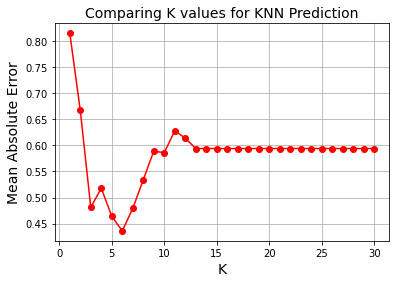

In [31]:
repeatCal(30)